# Rule: **retrieve_databundle**

**Outputs (selection)**
- data/bundle/`h2_salt_caverns_GWh_per_sqkm.geojson`




In [1]:
######################################## Parameters 

### Run
name = ''
prefix = ''

In [2]:
##### Import packages
import geopandas as gpd
import yaml
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt 
import matplotlib
import sys
import os 


##### Import local functions
sys.path.append(os.path.abspath(os.path.join('..')))
import functions as xp


##### Read params.yaml
with open('../params.yaml', 'r') as configfile:
    params = yaml.safe_load(configfile)


##### Ignore warnings
import warnings
warnings.filterwarnings('ignore', category=UserWarning)


# ##### Region files
# file_NUTS0 = f'NUTS_RG_01M_2021_4326_LEVL_0.geojson'
# path_NUTS0 = f'{params['rootpath']}/data/nuts/{prefix}/{name}/'
# NUTS0 = gpd.read_file(path_NUTS0+file_NUTS0)

## `h2_salt_caverns_GWh_per_sqkm.geojson`

Load the file and show its components.

In [3]:
file = f'h2_salt_caverns_GWh_per_sqkm.geojson'
path = f'{params['rootpath']}/data/bundle/{prefix}/{name}/'

h2_salt_caverns = gpd.read_file(path+file)

h2_salt_caverns.head()

,val_kwhm3,capacity_per_area,storage_type,geometry
0,200,111.177933,onshore,"POLYGON ((19.97965 40.96842, 20.00255 40.96842..."
1,300,166.766899,onshore,"MULTIPOLYGON (((19.95847 40.83096, 19.97965 40..."
2,350,194.561382,onshore,"POLYGON ((19.97052 40.89969, 19.97965 40.89969..."
3,400,222.355865,onshore,"POLYGON ((19.96784 40.94551, 19.97965 40.94551..."
4,200,0.000000,onshore,"POLYGON ((20.644 39.8688, 20.66691 39.8688, 20..."


How many entries are there in the file?

In [4]:
len(h2_salt_caverns)

119

Plot a map showing the **energy density**.

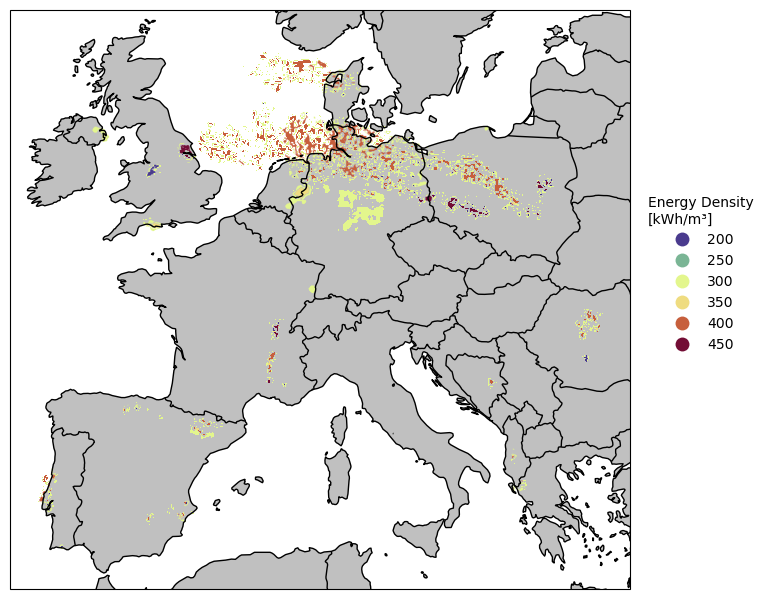

In [13]:
fig_size = [8,8]
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=fig_size, subplot_kw={'projection': crs})
limit_spain = False

## Plot cavern's energy density
xp.map_databundle_h2_salt_caverns(ax, h2_salt_caverns, limit_spain)

### Add map features
xp.map_add_features(ax, params['map_add_features'])

<div style="border: 2px solid blue; padding: 30px; border-radius: 5px; background-color: #DDEEFF; color: #00529B; max-width: 38%; margin: auto;">
    💡 <b>Explanatory note</b>: Reasons for different energy densities thoughout different caves.
</div>

It is assumed that the **temperature** of the hydrogen inside the cavern is equivalent to that of the surrounding rock. Similarly, the pressure of the gas stored within the cavern is governed by the lithostatic **pressure**, adjusted for operational safety margins. This is analogous to how pressure increases when descending into the ocean, with a comparable effect when moving deeper into the Earth's crust. The density used in the calculations must be based on the rock density ($\rho_{rock}$) of the overlying terrain. 

By applying the real gas law and considering the compressibility factor (Z), the **minimum and maximum gas densities** can be determined based on the safety margins mentioned above. Using these densities, along with the cavern’s volume, the mass of working gas can be calculated. This mass represents the amount of hydrogen that can be safely stored and extracted from the cavern without exceeding the established pressure safety margins.

Given these considerations, the **storage capacity** of a cavern can be determined in terms of $GWh_{H_2}$ by multiplying the mass of hydrogen by its lower heating value (LHV). To facilitate comparison between caverns at different locations, the **energy density** is calculated by dividing the cavern’s capacity by its volume. <u>It varies across different caverns due to changes in density, primarily influenced by each cavern's depth</u>. 



Particularized for Spain

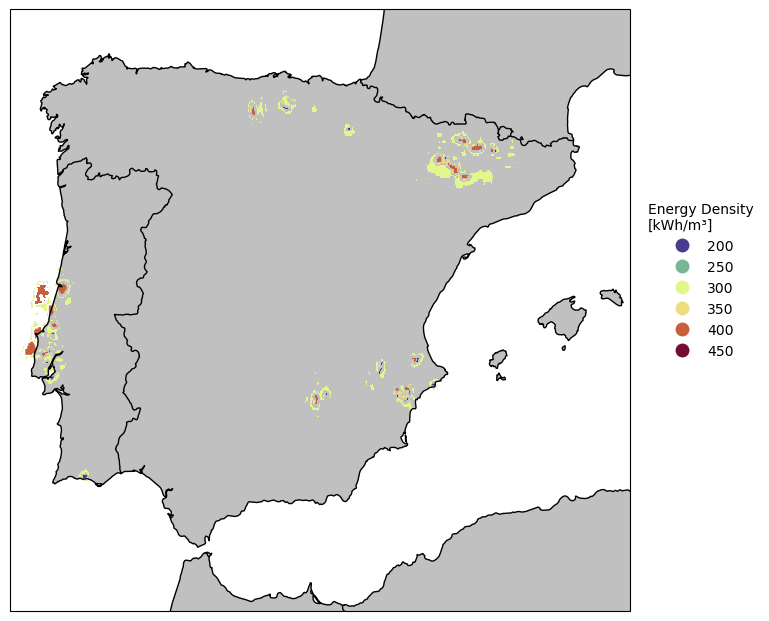

In [12]:
xp.map_add_features(ax, params['map_add_features'])

fig_size = [8,8]
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=fig_size, subplot_kw={'projection': crs})
limit_spain = True

xp.map_databundle_h2_salt_caverns(ax, h2_salt_caverns, limit_spain)
xp.map_add_features(ax, params['map_add_features'])

Plot a map showing the **capacity per area**.

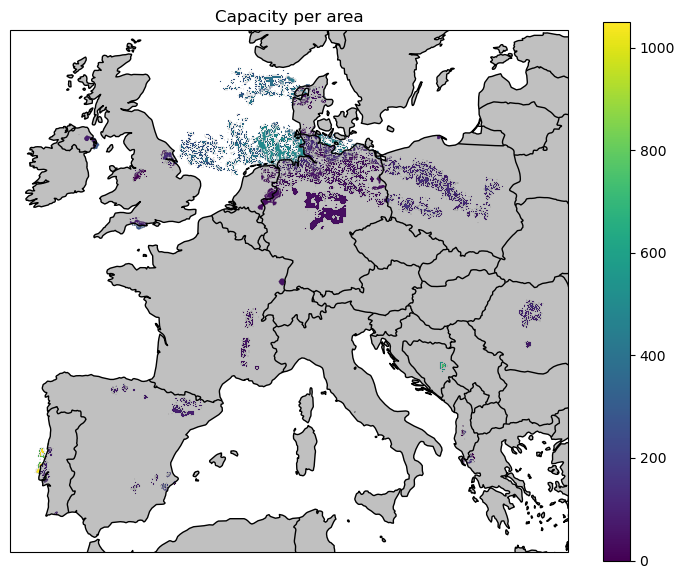

In [ ]:
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(9,7), subplot_kw={'projection': crs})
h2_salt_caverns.plot(ax=ax, column="capacity_per_area", linewidth=0.05,edgecolor="black", legend=True)

#We limit the map to the h2 cavern map extent 
lim_h2=h2_salt_caverns.total_bounds
buffer=1.7
ax.set_xlim(lim_h2[0]-buffer,lim_h2[2]+buffer)
ax.set_ylim(lim_h2[1]-buffer, lim_h2[3]+buffer)
ax.set_ylabel("Latitude")
ax.set_xlabel("Longitude")
ax.set_title("Capacity per area")
xp.map_add_features(ax, params['map_add_features'])


Particularized for Spain

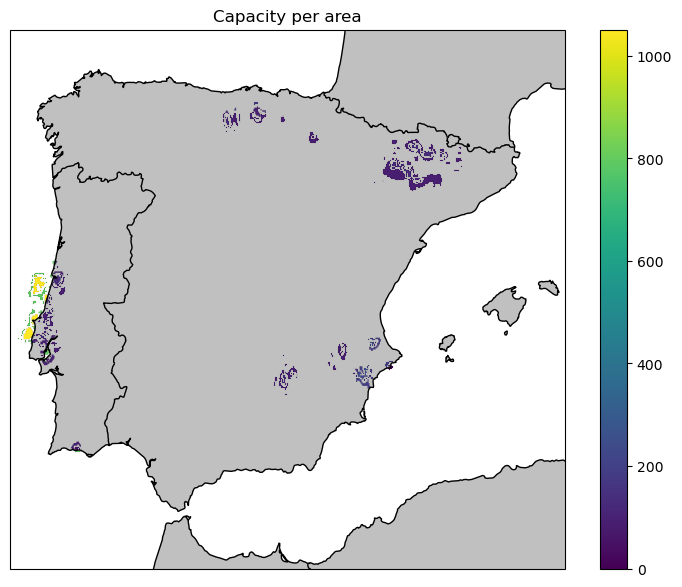

In [11]:
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(9,7), subplot_kw={'projection': crs})
h2_salt_caverns.plot(ax=ax, column="capacity_per_area", linewidth=0.05,edgecolor="black", legend=True)
#We limit the map to Spain Bounds
ax.set_xlim(-10,4.5)
ax.set_ylim(35, 44.5)
ax.set_ylabel("Latitude")
ax.set_xlabel("Longitude")
ax.set_title("Capacity per area")
xp.map_add_features(ax, params['map_add_features'])